Improt libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import math

Data collection

In [2]:
df = pd.read_csv("../../data/raw/winequality-red.csv")
df.shape

(1599, 12)

In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
#checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis and Visulaization

1. Class distribution

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.00000

/tmp/ipykernel_2057/1821244884.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


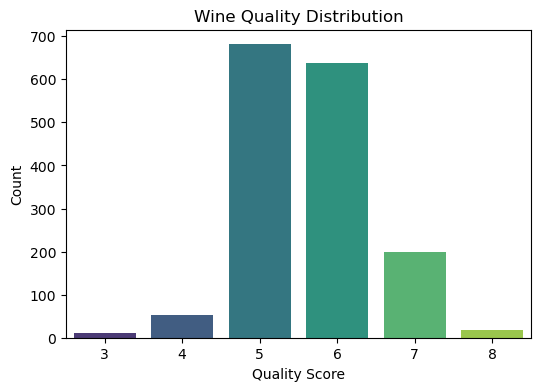

In [5]:
# Quick overview of data
print(df.info())
print(df.describe())

# Check class balance
plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Wine Quality Distribution')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()


2. Feature Distributions

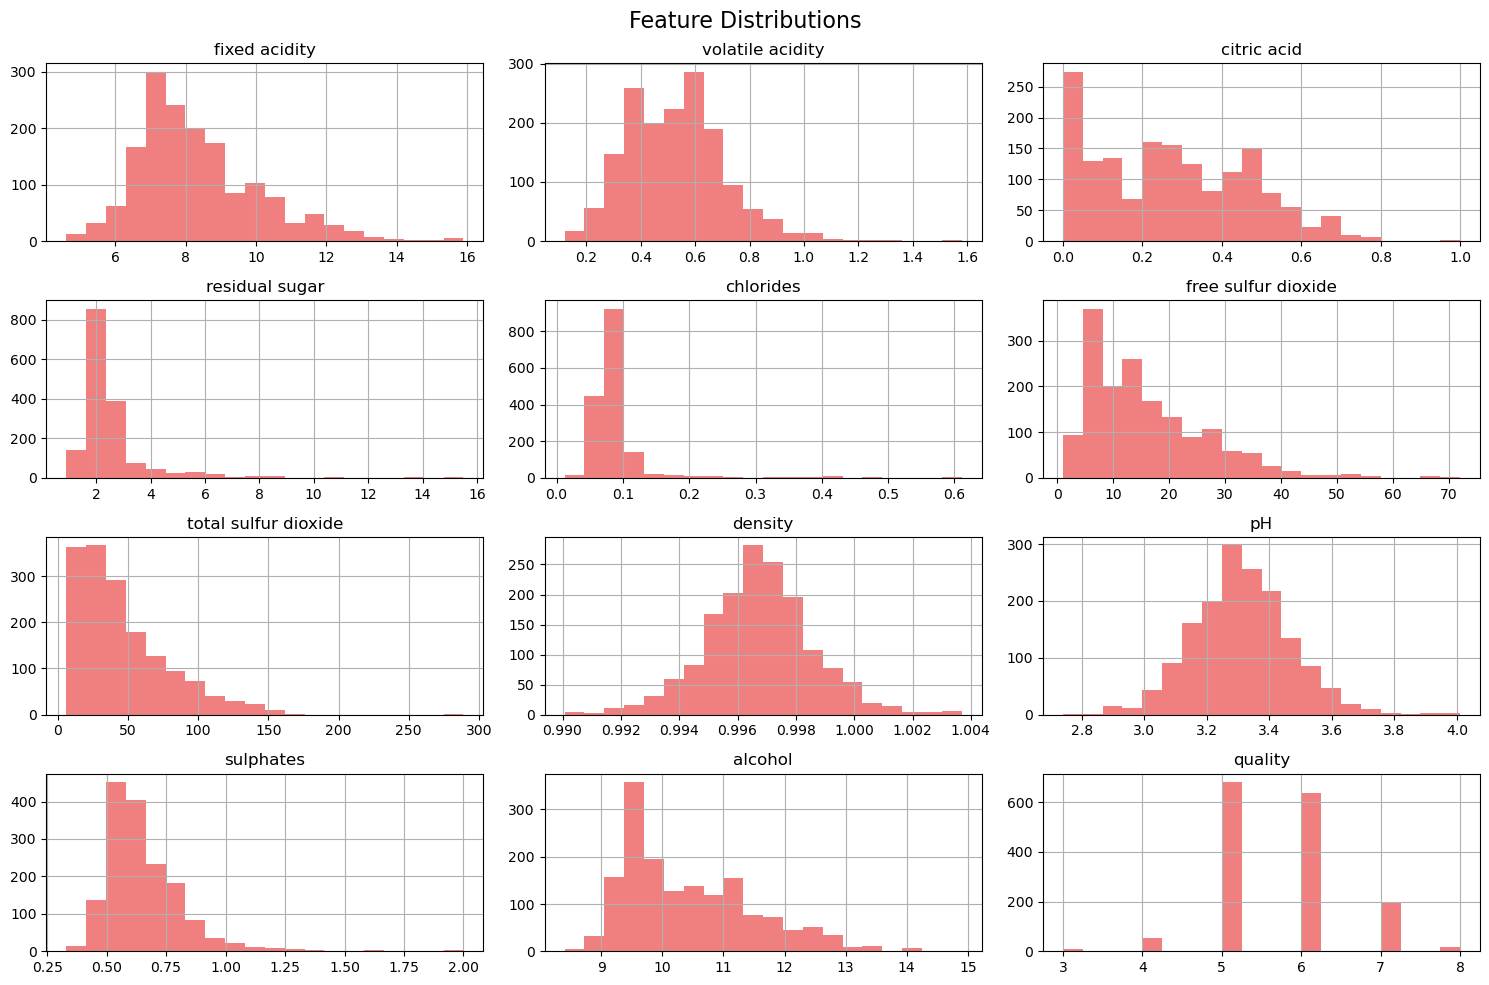

In [6]:
# Plot distributions for all features
df.hist(bins=20, figsize=(15,10), color='lightcoral')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

3. Boxplots by Quality (Feature vs Target)

/tmp/ipykernel_2057/1688166357.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette='magma')
/tmp/ipykernel_2057/1688166357.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette='magma')
/tmp/ipykernel_2057/1688166357.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette='magma')
/tmp/ipykernel_2057/1688166357.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` var

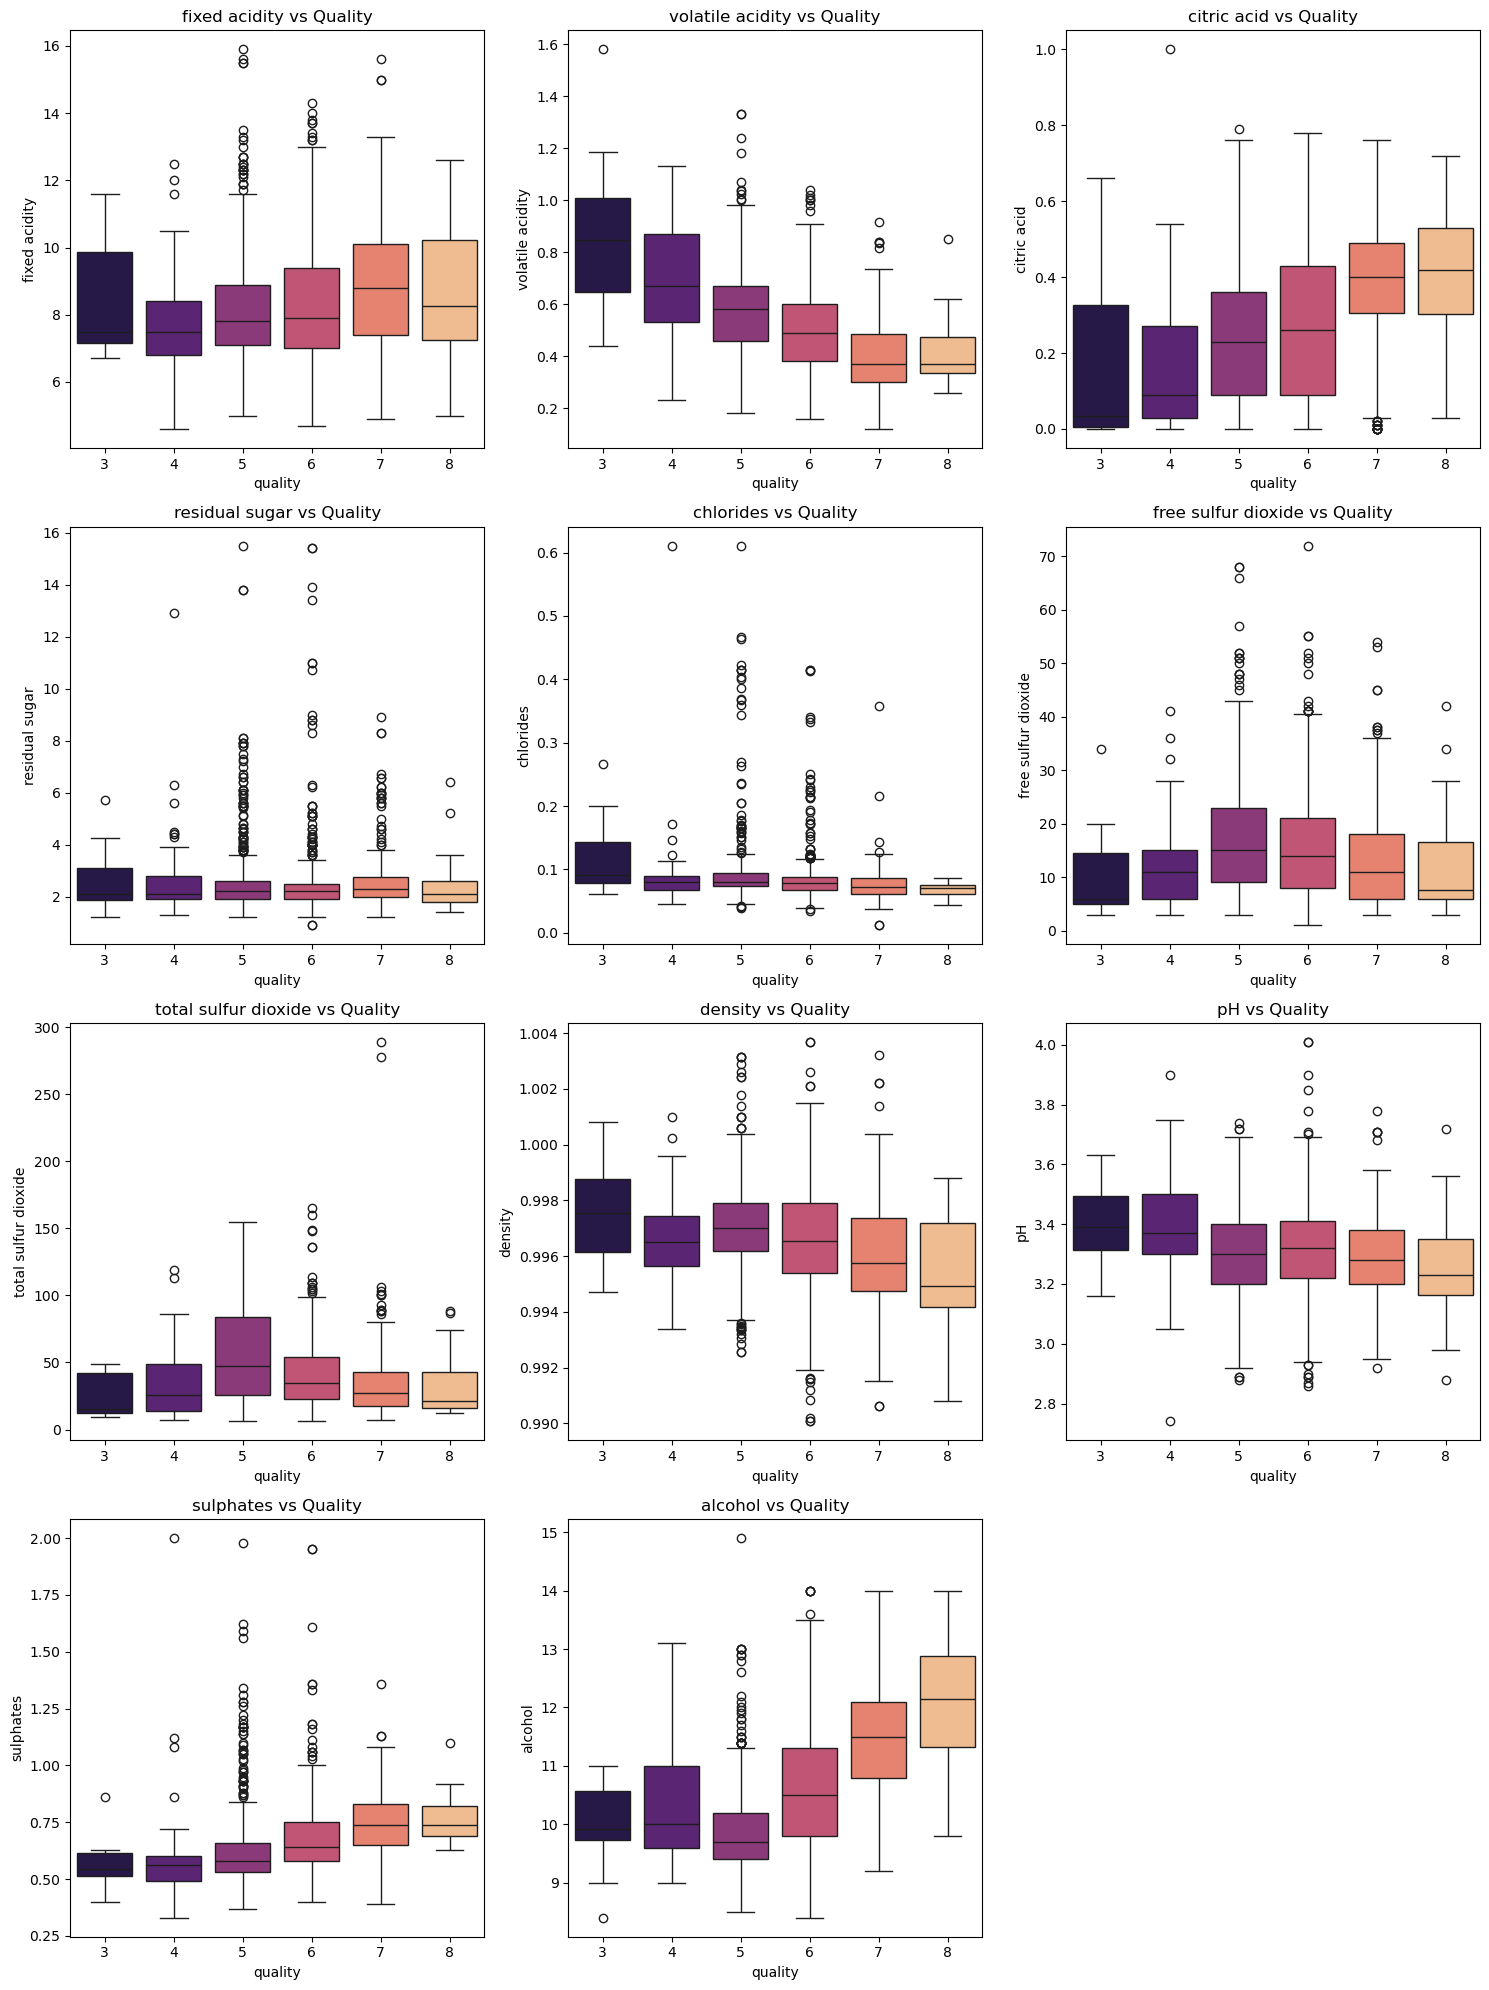

In [7]:
# Boxplot of each feature grouped by wine quality
features = df.columns[:-1]  # Exclude 'quality'

plt.figure(figsize=(15, 20))
for i, col in enumerate(features):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x='quality', y=col, data=df, palette='magma')
    plt.title(f'{col} vs Quality')

plt.tight_layout()
plt.show()

4. Correlation Heatmap

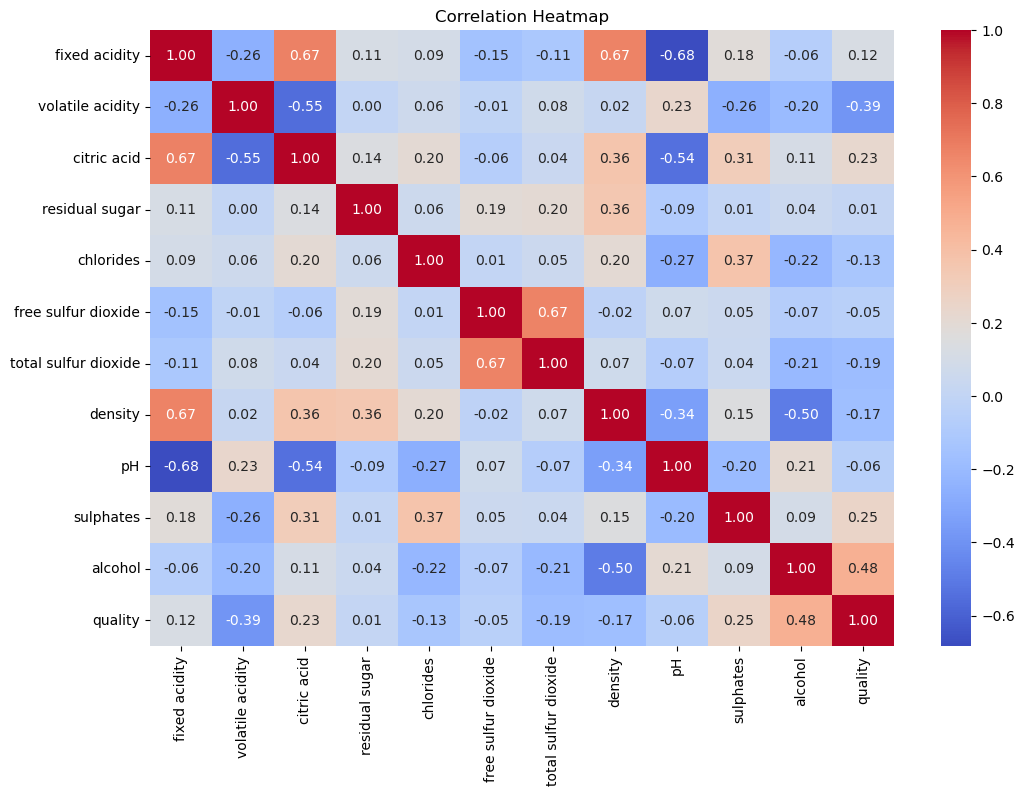

In [8]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

5. Pairplot

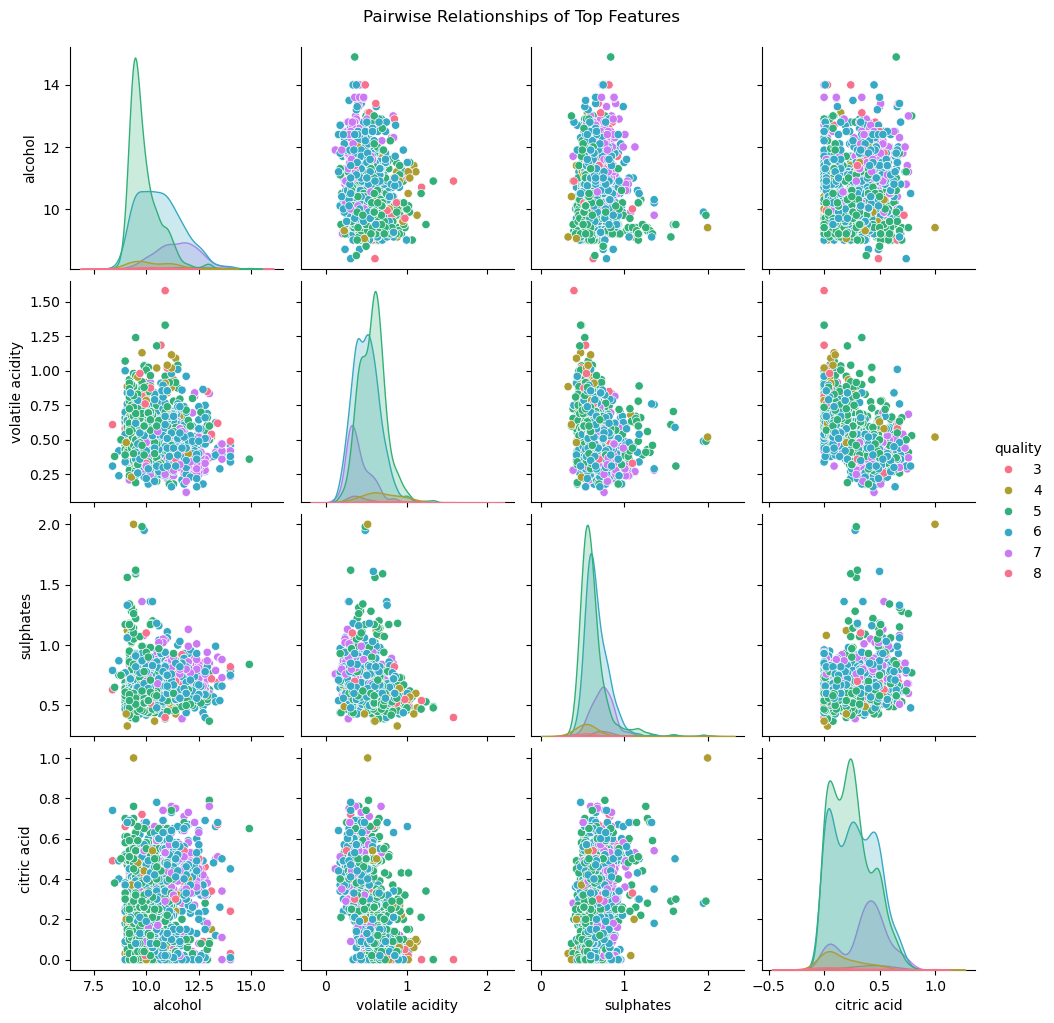

In [9]:
# Pick top correlated features with quality
top_corr_features = corr['quality'].abs().sort_values(ascending=False)[1:5].index.tolist()

# Pairplot
sns.pairplot(df, vars=top_corr_features, hue='quality', palette='husl')
plt.suptitle("Pairwise Relationships of Top Features", y=1.02)
plt.show()

Data Preprocessing

In [10]:
# Check missing values
print(f"\nMissing values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found!")


Missing values:
No missing values found!


In [11]:
# Check duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 240


Data Cleaning

In [12]:
initial_shape = df.shape
print(f"Initial dataset shape: {initial_shape}")

Initial dataset shape: (1599, 12)


In [13]:
# Remove duplicates
df_clean = df.drop_duplicates()
print(f"After removing duplicates: {df_clean.shape}")

After removing duplicates: (1359, 12)


In [14]:
if df.duplicated().sum() > 0:
    print("\nDuplicate rows (before removal):")
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)))
    df = df.drop_duplicates()
    print(f"\nRemoved {df.duplicated().sum()} duplicates. New shape:", df.shape)


Duplicate rows (before removal):
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
142             5.2             0.340         0.00             1.8      0.050   
144             5.2             0.340         0.00             1.8      0.050   
131             5.6             0.500         0.09             2.3      0.049   
132             5.6             0.500         0.09             2.3      0.049   
1488            5.6             0.540         0.04             1.7      0.049   
...             ...               ...          ...             ...        ...   
391            13.7             0.415         0.68             2.9      0.085   
243            15.0             0.210         0.44             2.2      0.075   
244            15.0             0.210         0.44             2.2      0.075   
554            15.5             0.645         0.49             4.2      0.095   
555            15.5             0.645         0.49             4.2      0.0

In [15]:
print("\nNumber of duplicates:", df.duplicated().sum())


Number of duplicates: 0


In [16]:
# Handle missing values (No any missing values hear)
if df_clean.isnull().sum().sum() > 0:
    print("Handling missing values...")
    numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
    df_clean[numerical_cols] = df_clean[numerical_cols].fillna(df_clean[numerical_cols].median())
    print("Missing values filled with median")

Feature Engineering

1. create binary target column

In [17]:
# Create binary classification label: 1 for good quality (>=7), 0 for not good
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Check label distribution
df['quality_label'].value_counts()


quality_label
0    1175
1     184
Name: count, dtype: int64

2. Feature-Target Split

In [18]:
# Drop 'quality' and use 'quality_label' as target
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']


3. Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


4. Scaling

In [20]:
# Then scale only using training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

test